# **Project UTS Visi Komputer**

## **Banana Ripeness Detection**

### **Import Libraries**
Library yang diperlukan untuk sistem deteksi kematangan pisang:
- **OpenCV (cv2)**: Untuk pemrosesan gambar dan computer vision
- **NumPy**: Untuk operasi array dan matriks
- **scikit-learn (KMeans)**: Untuk clustering warna
- **Matplotlib**: Untuk visualisasi hasil

Setiap library memiliki peran penting:
- cv2: Edge detection, color conversion, image processing
- NumPy: Matrix operations, array manipulations
- KMeans: Color clustering dan analisis
- Matplotlib: Plotting dan visualisasi hasil analisis

In [33]:
# Import library yang diperlukan
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


## **Inisialisasi Class BananaRipenessDetector**
### Praktikum 1: Basic Python - OOP Concepts

Class ini mengimplementasikan sistem deteksi kematangan pisang dengan parameter warna dalam ruang HSV:

**Range Warna untuk Klasifikasi:**
1. **Pisang Mentah (Unripe)**:
   - Hue: 25-35 (hijau kekuningan)
   - Saturation: 50-255
   - Value: 50-255

2. **Pisang Matang (Ripe)**:
   - Hue: 20-30 (kuning)
   - Saturation: 100-255
   - Value: 100-255

3. **Pisang Terlalu Matang (Overripe)**:
   - Hue: 0-20 (coklat)
   - Saturation: 50-255
   - Value: 20-255

Range warna ini dikalibrasi berdasarkan observasi karakteristik warna pisang pada berbagai tingkat kematangan.

In [34]:
class BananaRipenessDetector:
    """
    Kelas untuk mendeteksi tingkat kematangan pisang menggunakan teknik computer vision.
    Mengimplementasikan konsep dari Praktikum 1-6
    """
    def __init__(self):
        """
        Inisialisasi range warna untuk berbagai tingkat kematangan pisang dalam ruang warna HSV
        Bagian dari Praktikum 1: Basic Python - Pengenalan Class dan Atribut
        """
        # Range warna untuk pisang mentah (hijau kekuningan)
        self.unripe_range = {
            'lower': np.array([25, 50, 50]),
            'upper': np.array([35, 255, 255])
        }
        # Range warna untuk pisang matang (kuning)
        self.ripe_range = {
            'lower': np.array([20, 100, 100]),
            'upper': np.array([30, 255, 255])
        }
        # Range warna untuk pisang terlalu matang (coklat)
        self.overripe_range = {
            'lower': np.array([0, 50, 20]),
            'upper': np.array([20, 255, 255])
        }

# Buat instance dari class
detector = BananaRipenessDetector()
print("BananaRipenessDetector initialized successfully!")

BananaRipenessDetector initialized successfully!


## **Preprocessing Methods**
### Praktikum 1 & 2: Basic Python dan Filtering

Implementasi metode preprocessing untuk meningkatkan kualitas gambar:

1. **Resize Image**:
   - Standarisasi ukuran (400x400)
   - Memastikan konsistensi analisis

2. **Color Space Conversion**:
   - BGR ke LAB: Untuk analisis intensitas dan komponen warna
   - BGR ke HSV: Untuk segmentasi warna yang robust

3. **Image Enhancement**:
   - Gaussian Blur: Mengurangi noise
   - Sharpening: Meningkatkan detail menggunakan kernel konvolusi
   ```[-1,-1,-1],
      [-1, 9,-1],
      [-1,-1,-1]```

4. **Output**:
   - HSV image: Untuk analisis warna
   - LAB image: Untuk analisis intensitas

In [35]:
def preprocess_image(self, image):
    """
    Melakukan preprocessing pada gambar input.
    
    Praktikum 1 & 2:
    - Basic Python: Image reading dan manipulasi dasar
    - Filtering: Color transformation, image enhancement
    
    Parameters:
        image: Gambar input dalam format BGR
    
    Returns:
        tuple: (hsv_image, lab_image) - Gambar dalam ruang warna HSV dan LAB
    """
    # Resize gambar untuk konsistensi
    resized = cv2.resize(image, (400, 400))
    
    # Konversi ke LAB color space
    lab = cv2.cvtColor(resized, cv2.COLOR_BGR2LAB)
    
    # Aplikasikan Gaussian blur untuk mengurangi noise
    blurred = cv2.GaussianBlur(resized, (5, 5), 0)
    
    # Penajaman gambar menggunakan kernel
    kernel = np.array([[-1,-1,-1], 
                     [-1, 9,-1],
                     [-1,-1,-1]])
    sharpened = cv2.filter2D(blurred, -1, kernel)
    
    # Konversi ke HSV setelah enhancement
    hsv = cv2.cvtColor(sharpened, cv2.COLOR_BGR2HSV)
    
    return hsv, lab

# Tambahkan method ke class
BananaRipenessDetector.preprocess_image = preprocess_image
print("Preprocessing methods added successfully!")

Preprocessing methods added successfully!


## ****Edge Detection Methods**
### Praktikum 3: Edge Detection

Implementasi deteksi tepi menggunakan multiple techniques:

1. **Grayscale Conversion**:
   - Mengubah gambar ke grayscale untuk analisis intensitas
   - Mengurangi kompleksitas komputasi

2. **Histogram Analysis**:
   - Menghitung distribusi intensitas piksel
   - Membantu dalam penentuan threshold

3. **Thresholding**:
   - Otsu's method untuk threshold optimal
   - Menghasilkan binary image untuk segmentasi

4. **Canny Edge Detection**:
   - Threshold: 100-200
   - Mendeteksi tepi dengan presisi tinggi
   - Hasil: Edge map untuk analisis bentuk pisang

In [36]:
def detect_edges(self, image):
    """
    Implementasi deteksi tepi pada gambar.
    
    Praktikum 3: Edge Detection
    - Konversi grayscale
    - Histogram calculation
    - Thresholding
    - Edge detection menggunakan Canny
    
    Parameters:
        image: Gambar input dalam format BGR
    
    Returns:
        tuple: (edges, binary) - Hasil deteksi tepi dan hasil thresholding
    """
    # Konversi ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Hitung histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    
    # Aplikasikan thresholding menggunakan Otsu's method
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Deteksi tepi menggunakan Canny
    edges = cv2.Canny(gray, 100, 200)
    
    return edges, binary

# Tambahkan method ke class
BananaRipenessDetector.detect_edges = detect_edges
print("Edge detection methods added successfully!")

Edge detection methods added successfully!


## **Boundary Detection Methods**
### Praktikum 4: Boundary Detection Using Fourier Transform

Implementasi deteksi batas objek menggunakan dua pendekatan:

1. **Fourier Transform**:
   - Mengkonversi gambar ke domain frekuensi
   - Membantu analisis karakteristik spektral gambar
   - Berguna untuk deteksi pola repetitif pada kulit pisang

2. **Contour Detection**:
   - Menggunakan hasil Canny Edge Detection
   - RETR_EXTERNAL: Hanya mengambil kontur terluar
   - CHAIN_APPROX_SIMPLE: Mengoptimalkan representasi kontur

**Kegunaan:**
- Mendeteksi bentuk keseluruhan pisang
- Memisahkan objek pisang dari background
- Membantu analisis tekstur permukaan

In [37]:
def detect_boundaries(self, image):
    """
    Implementasi deteksi batas objek menggunakan Fourier Transform.
    
    Praktikum 4: Boundary Detection
    - Fourier transform untuk analisis frekuensi
    - Contour detection untuk menemukan batas objek
    
    Parameters:
        image: Gambar input dalam format BGR
        
    Returns:
        tuple: (contours, f_shift) - Kontur yang terdeteksi dan hasil Fourier transform
    """
    # Aplikasikan Fourier Transform
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f_transform = np.fft.fft2(gray)
    f_shift = np.fft.fftshift(f_transform)
    
    # Temukan kontur menggunakan Canny edge detection
    contours, _ = cv2.findContours(
        cv2.Canny(gray, 100, 200),
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
    )
    
    return contours, f_shift

# Tambahkan method ke class
BananaRipenessDetector.detect_boundaries = detect_boundaries
print("Boundary detection methods added successfully!")

Boundary detection methods added successfully!


## **Feature Extraction Methods**
### Praktikum 5: Feature Extraction and Analysis

Implementasi dua metode utama ekstraksi fitur:

1. **SIFT (Scale-Invariant Feature Transform)**:
   - Deteksi keypoints yang invariant terhadap skala dan rotasi
   - Menghasilkan deskriptor fitur untuk analisis tekstur
   - Membantu identifikasi pola bintik pada pisang

2. **Color Clustering dengan K-means**:
   - n_clusters=3: Mengekstrak 3 warna dominan
   - Mengelompokkan piksel berdasarkan kesamaan warna
   - Membantu analisis distribusi warna pada pisang

**Aplikasi dalam Analisis Kematangan:**
- Tekstur: Mengidentifikasi bintik-bintik coklat/hitam
- Warna Dominan: Menentukan tingkat kematangan
- Deskriptor: Menganalisis pola permukaan pisang

In [38]:
def extract_features(self, image):
    """
    Ekstraksi fitur menggunakan SIFT dan analisis warna.
    
    Praktikum 5: Feature Extraction
    - SIFT keypoint detection
    - Color clustering menggunakan K-means
    
    Parameters:
        image: Gambar input dalam format BGR
        
    Returns:
        tuple: (keypoints, descriptors, dominant_colors) - Fitur SIFT dan warna dominan
    """
    # SIFT feature detection
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(
        cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),
        None
    )
    
    # Color clustering menggunakan K-means
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(pixels)
    dominant_colors = kmeans.cluster_centers_.astype(int)
    
    return keypoints, descriptors, dominant_colors

def extract_dominant_colors(self, image, n_colors=3):
    """
    Ekstrak warna dominan menggunakan K-means clustering.
    
    Parameters:
        image: Gambar input dalam format BGR
        n_colors: Jumlah warna dominan yang akan diekstrak
        
    Returns:
        array: Warna-warna dominan dalam format BGR
    """
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_
    return colors.astype(int)

# Tambahkan methods ke class
BananaRipenessDetector.extract_features = extract_features
BananaRipenessDetector.extract_dominant_colors = extract_dominant_colors
print("Feature extraction methods added successfully!")

Feature extraction methods added successfully!


## **Segmentation Methods**
### Praktikum 6: Advanced Segmentation Techniques

Implementasi tiga metode segmentasi utama:

1. **Watershed Segmentation**:
   - Menggunakan markers dari hasil edge detection
   - Memisahkan objek pisang dari background
   - Parameters:
     - markers: Label untuk region berbeda
     - edges: Boundary markers

2. **Color-based Masking**:
   - Menggunakan range HSV yang telah didefinisikan
   - Membuat mask untuk setiap tingkat kematangan
   - Menggunakan cv2.inRange untuk thresholding warna

3. **Percentage Calculation**:
   - Menghitung rasio piksel dalam setiap mask
   - Memberikan persentase untuk setiap tingkat kematangan
   - Formula: (white_pixels / total_pixels) * 100

**Output:**
- Binary mask untuk segmentasi
- Persentase area untuk setiap kategori kematangan

In [39]:
def segment_image(self, image, edges):
    """
    Segmentasi gambar menggunakan watershed algorithm.
    
    Praktikum 6: Segmentation
    - Watershed segmentation
    - Binary thresholding
    - Marker creation
    
    Parameters:
        image: Gambar input dalam format BGR
        edges: Hasil deteksi tepi
        
    Returns:
        array: Mask hasil segmentasi
    """
    # Buat markers untuk watershed
    markers = np.zeros(image.shape[0:2], dtype=np.int32)
    
    # Gunakan binary thresholding untuk initial markers
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Apply watershed
    markers[binary > 0] = 1
    markers[edges > 0] = 2
    cv2.watershed(image, markers)
    
    # Buat final mask
    mask = np.zeros_like(gray)
    mask[markers == 1] = 255
    
    return mask

def create_mask(self, hsv_image, lower_range, upper_range):
    """
    Buat mask berdasarkan range warna tertentu.
    
    Parameters:
        hsv_image: Gambar dalam format HSV
        lower_range: Batas bawah range warna
        upper_range: Batas atas range warna
        
    Returns:
        array: Mask binary
    """
    mask = cv2.inRange(hsv_image, lower_range, upper_range)
    return mask

def calculate_color_percentage(self, mask):
    """
    Hitung persentase piksel dalam mask.
    
    Parameters:
        mask: Mask binary
        
    Returns:
        float: Persentase area yang terdeteksi
    """
    total_pixels = mask.shape[0] * mask.shape[1]
    white_pixels = cv2.countNonZero(mask)
    return (white_pixels / total_pixels) * 100

# Tambahkan methods ke class
BananaRipenessDetector.segment_image = segment_image
BananaRipenessDetector.create_mask = create_mask
BananaRipenessDetector.calculate_color_percentage = calculate_color_percentage
print("Segmentation methods added successfully!")

Segmentation methods added successfully!


## **Main Detection Method**
### Integrasi Semua Praktikum (1-6)

Method utama yang mengintegrasikan semua komponen analisis:

**Alur Proses:**
1. **Input Processing**:
   - Membaca gambar
   - Validasi input
   - Error handling untuk file tidak valid

2. **Analisis Tahap 1 (Praktikum 1-2)**:
   - Preprocessing
   - Color space conversion
   - Image enhancement

3. **Analisis Tahap 2 (Praktikum 3-4)**:
   - Edge detection
   - Boundary detection
   - Fourier analysis

4. **Analisis Tahap 3 (Praktikum 5-6)**:
   - Feature extraction
   - Segmentation
   - Color analysis

5. **Hasil Analisis:**
   - Tingkat kematangan (Mentah/Matang/Terlalu Matang)
   - Persentase untuk setiap kategori
   - Visualisasi komprehensif

In [40]:
def detect_ripeness(self, image_path):
    """
    Fungsi utama untuk deteksi kematangan pisang.
    Mengintegrasikan semua metode dari Praktikum 1-6.
    
    Parameters:
        image_path: Path ke file gambar pisang
        
    Returns:
        dict: Hasil analisis termasuk tingkat kematangan dan visualisasi
    """
    # Baca gambar
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Tidak dapat membaca gambar")

    # Preprocessing (Praktikum 1 & 2)
    hsv_image, lab_image = self.preprocess_image(image)
    
    # Edge dan boundary detection (Praktikum 3 & 4)
    edges, binary = self.detect_edges(image)
    contours, fourier = self.detect_boundaries(image)
    
    # Feature extraction (Praktikum 5)
    keypoints, descriptors, dominant_colors = self.extract_features(image)
    
    # Segmentation (Praktikum 6)
    segmentation_mask = self.segment_image(image, edges)
    
    # Analisis kematangan berdasarkan warna
    unripe_mask = self.create_mask(hsv_image, self.unripe_range['lower'], self.unripe_range['upper'])
    ripe_mask = self.create_mask(hsv_image, self.ripe_range['lower'], self.ripe_range['upper'])
    overripe_mask = self.create_mask(hsv_image, self.overripe_range['lower'], self.overripe_range['upper'])

    # Hitung persentase
    percentages = {
        'Mentah': self.calculate_color_percentage(unripe_mask),
        'Matang': self.calculate_color_percentage(ripe_mask),
        'Terlalu Matang': self.calculate_color_percentage(overripe_mask)
    }
    
    ripeness = max(percentages.items(), key=lambda x: x[1])[0]

    return {
        'ripeness': ripeness,
        'percentages': percentages,
        'dominant_colors': dominant_colors,
        'edges': edges,
        'contours': contours,
        'segmentation': segmentation_mask,
        'keypoints': keypoints
    }

# Tambahkan method ke class
BananaRipenessDetector.detect_ripeness = detect_ripeness
print("Main detection method added successfully!")

Main detection method added successfully!


## **Visualization Method**
### Visualisasi Komprehensif Hasil Analisis

Method untuk menampilkan hasil analisis dalam format yang mudah dipahami:

**Komponen Visualisasi:**
1. **Original Image (subplot 231)**:
   - Gambar input asli
   - Konversi BGR ke RGB untuk display

2. **Edge Detection (subplot 232)**:
   - Hasil deteksi tepi
   - Visualisasi dalam grayscale

3. **Segmentation (subplot 233)**:
   - Hasil segmentasi watershed
   - Binary mask visualization

4. **Feature Points (subplot 234)**:
   - SIFT keypoints
   - Overlay pada gambar asli

5. **Contours (subplot 235)**:
   - Boundary detection
   - Overlay hijau pada gambar asli

6. **Ripeness Chart (subplot 236)**:
   - Bar chart persentase kematangan
   - Rotasi label 45° untuk keterbacaan

**Layout:**
- Figure size: 15x10 inches
- Tight layout untuk optimal spacing
- Subplot arrangement: 2x3 grid

In [41]:
def visualize_results(self, image_path, results):
    """
    Visualisasi hasil analisis kematangan pisang.
    Menampilkan semua komponen analisis dari Praktikum 1-6.
    
    Parameters:
        image_path: Path ke file gambar pisang
        results: Dictionary hasil analisis dari detect_ripeness
    """
    image = cv2.imread(image_path)
    
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(231)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Original')
    
    # Edge detection (Praktikum 3)
    plt.subplot(232)
    plt.imshow(results['edges'], cmap='gray')
    plt.title('Edge Detection')
    
    # Segmentation (Praktikum 6)
    plt.subplot(233)
    plt.imshow(results['segmentation'], cmap='gray')
    plt.title('Segmentation')
    
    # Feature points (Praktikum 5)
    plt.subplot(234)
    img_with_keypoints = cv2.drawKeypoints(
        image, 
        results['keypoints'], 
        None,
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.title('Feature Points')
    
    # Contours (Praktikum 4)
    plt.subplot(235)
    img_with_contours = image.copy()
    cv2.drawContours(img_with_contours, results['contours'], -1, (0,255,0), 2)
    plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
    plt.title('Contours')
    
    # Ripeness percentages
    plt.subplot(236)
    plt.bar(results['percentages'].keys(), results['percentages'].values())
    plt.title('Persentase Kematangan')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Tambahkan method ke class
BananaRipenessDetector.visualize_results = visualize_results
print("Visualization method added successfully!")

Visualization method added successfully!


##**Testing dan Implementasi**
### Penggunaan Sistem Deteksi Kematangan Pisang

**Langkah Penggunaan:**
1. **Inisialisasi Detector:**
   ```python
   detector = BananaRipenessDetector()
   ```

2. **Load dan Analisis Gambar:**
   - Masukkan path gambar pisang
   - System akan memproses dan menganalisis
   ```python
   # Contoh penggunaan
   image_path = "path/to/banana.jpg"
   results = detector.detect_ripeness(image_path)
   ```

3. **Output yang Dihasilkan:**
   - Tingkat kematangan pisang:
     - Mentah
     - Matang
     - Terlalu Matang
   - Persentase untuk setiap kategori
   - Visualisasi komprehensif hasil analisis

### Error Handling
Sistem dilengkapi dengan penanganan error untuk berbagai kasus:
- **FileNotFoundError**: 
  - Muncul jika file gambar tidak ditemukan
  - Menampilkan daftar file gambar yang tersedia di direktori
- **ValueError**: 
  - Muncul jika gambar tidak dapat dibaca
  - Memberikan informasi format yang didukung
- **General Exception**: 
  - Menangkap error lain yang mungkin terjadi
  - Menampilkan pesan error yang informatif

### Tips Penggunaan
Untuk hasil optimal, perhatikan hal-hal berikut:

1. **Kualitas Gambar:**
   - Gunakan gambar dengan pencahayaan yang baik dan merata
   - Hindari gambar yang terlalu gelap atau terlalu terang

2. **Background:**
   - Pastikan background kontras dengan pisang
   - Background putih atau solid akan memberikan hasil terbaik

3. **Noise dan Gangguan:**
   - Hindari gambar dengan noise berlebihan
   - Pastikan tidak ada bayangan yang mengganggu
   - Hindari refleksi cahaya yang berlebihan

4. **Posisi Pisang:**
   - Posisikan pisang sejajar dengan kamera
   - Pastikan seluruh pisang terlihat dalam frame
   - Hindari tumpang tindih antar pisang

5. **Format dan Ukuran:**
   - Gunakan format gambar umum (JPG, PNG)
   - Resolusi minimal 400x400 piksel
   - Ukuran file tidak terlalu besar (<5MB)

Tingkat Kematangan: Matang

Persentase tiap kategori:
Mentah: 5.97%
Matang: 19.07%
Terlalu Matang: 8.42%


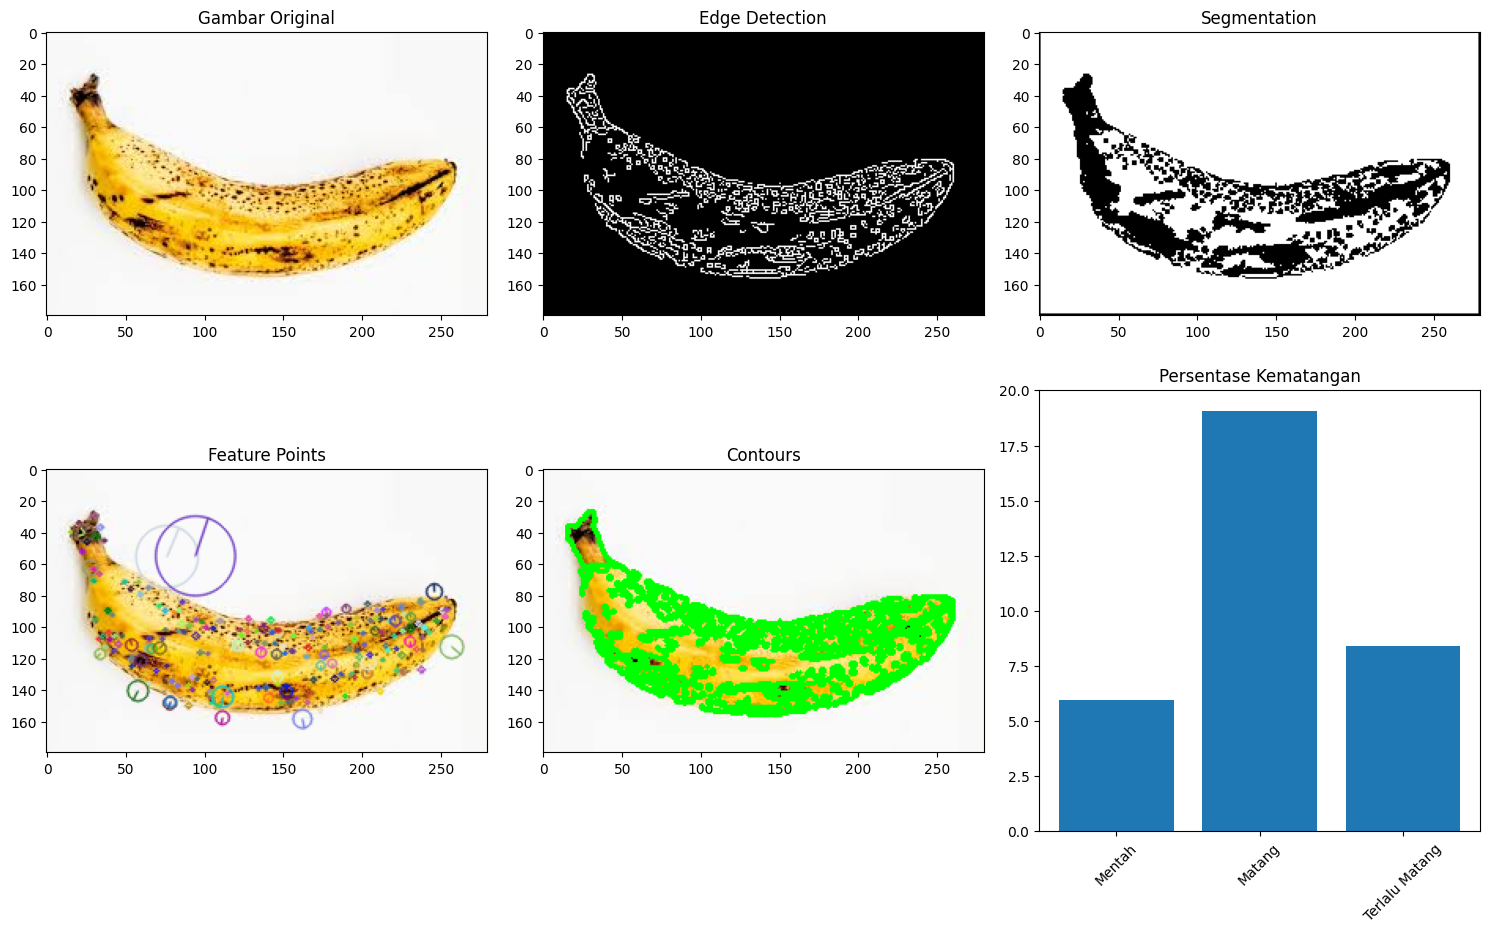

In [ ]:
# Test the banana ripeness detector
detector = BananaRipenessDetector()

# Contoh penggunaan
image_path = input("Masukkan path gambar pisang yang ingin dianalisis: ")

try:
    results = detector.detect_ripeness(image_path)
    print(f"Tingkat Kematangan: {results['ripeness']}")
    print("\nPersentase tiap kategori:")
    for category, percentage in results['percentages'].items():
        print(f"{category}: {percentage:.2f}%")
        
    detector.visualize_results(image_path, results)
    
except Exception as e:
    print(f"Error: {str(e)}")